## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

## Classification on exemplary provided datasets

### Binary classification

In [7]:
data = pd.read_csv('../src/data/classification/data.simple.test.100.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 1], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid'],
                    bias=True, problem='classification_binary')
print("Shape of NN:")
for layer in nn.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 1


In [8]:
y = y-1  # for binary crossentropy
nn.train(X.T, y, 5000, 0.7)

print("CLASSIFICATION DONE")
y_hat = nn.predict(X.T)

CLASSIFICATION DONE


In [9]:
nn.get_binary_accuracy_value(y_hat, y)

1.0

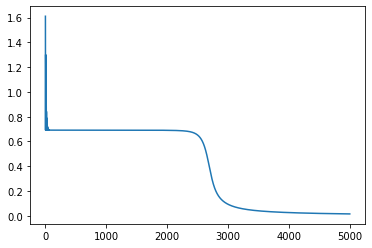

In [10]:
plt.plot(list(range(len(nn.history['cost']))), nn.history['cost'])

### Multiclass classification

### High learning rate

In [17]:
data = pd.read_csv('../src/data/classification/data.three_gauss.train.500.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 3], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'softmax'],
                    bias=True, problem='classification')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 3


In [18]:
y = y-1
nn2.train(X.T, y, 5000, 0.7)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

CLASSIFICATION DONE


In [19]:
y_hat

array([[9.88746355e-01, 9.97327032e-01, 7.24223573e-01, ...,
        4.98221728e-04, 1.86804108e-01, 6.47352840e-03],
       [1.10747775e-02, 2.64907921e-03, 2.57766273e-01, ...,
        3.47291200e-01, 6.83827162e-01, 5.63332230e-01],
       [1.78867260e-04, 2.38884594e-05, 1.80101540e-02, ...,
        6.52210578e-01, 1.29368730e-01, 4.30194242e-01]])

In [20]:
nn2.get_multiclass_accuracy(y_hat, y)

0.888

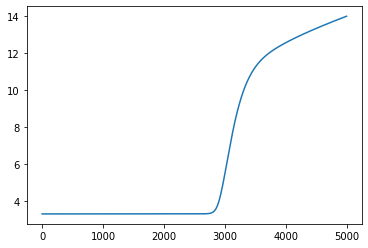

In [21]:
plt.plot(list(range(len(nn2.history['cost']))), nn2.history['cost'])

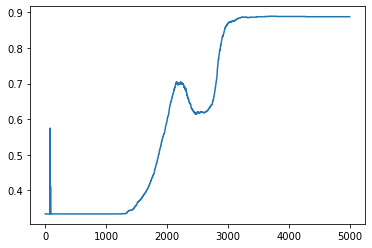

In [22]:
plt.plot(list(range(len(nn2.history['metrics']))), nn2.history['metrics'])

### Lower learning rate

In [23]:
data = pd.read_csv('../src/data/classification/data.three_gauss.train.500.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 3], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'softmax'],
                    bias=True, problem='classification')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 3


In [ ]:
y = y-1
nn2.train(X.T, y, 5000, 0.4)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

In [26]:
nn2.get_multiclass_accuracy(y_hat, y)

0.836

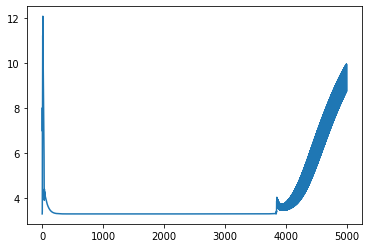

In [27]:
plt.plot(list(range(len(nn2.history['cost']))), nn2.history['cost'])

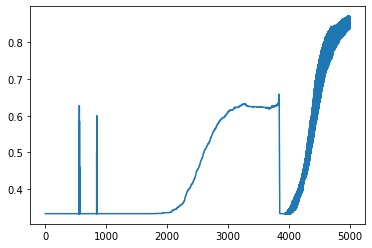

In [28]:
plt.plot(list(range(len(nn2.history['metrics']))), nn2.history['metrics'])

## Classification on external datasets

In [53]:
data = pd.read_csv('../src/data/classification_ext/SAheart.data.txt', header=None)
labels = pd.read_csv('../src/data/classification_ext/SAheart.labels.txt', header=None)

In [54]:
data

,0,1,2,3,4,5,6,7
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58
458,182,4.20,4.41,32.10,52,28.61,18.72,52
459,108,3.00,1.59,15.23,40,20.09,26.64,55
460,118,5.40,11.61,30.79,64,27.35,23.97,40


In [55]:
labels.shape

(462, 1)

In [65]:
X = data.values
y = labels.values.reshape((labels.shape[0], ))

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[8, 10,  100, 1], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid'],
                    bias=True, problem='classification_binary')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 8 8
Dense_1 8 10
Dense_2 10 100
Dense_3 100 1


In [84]:
nn2.train(X.T, y, 10000, 0.3)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

CLASSIFICATION DONE


In [85]:
nn2.get_binary_accuracy_value(y_hat, y)

0.6731601731601732

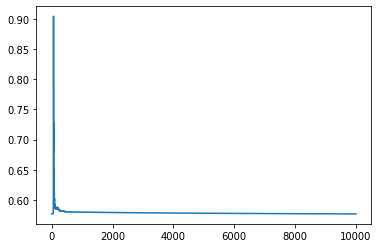

In [86]:
plt.plot(list(range(len(nn2.history['cost']))), nn2.history['cost'])

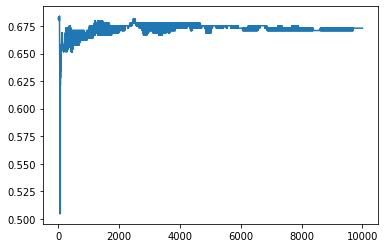

In [87]:
plt.plot(list(range(len(nn2.history['metrics']))), nn2.history['metrics'])